In [ ]:
# Import libraries 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")
import pandas.util.testing as tm

In [ ]:
df = pd.read_csv("/content/city_day.csv",parse_dates=['Date'])

In [ ]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [ ]:
df1 = df.groupby('City').get_group('Delhi')
df1.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
10229,Delhi,2015-01-01,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,9.84,472.0,Severe
10230,Delhi,2015-01-02,186.18,269.55,62.09,32.87,88.14,31.83,9.54,6.65,29.97,10.55,20.09,4.29,454.0,Severe
10231,Delhi,2015-01-03,87.18,131.90,25.73,30.31,47.95,69.55,10.61,2.65,19.71,3.91,10.23,1.99,143.0,Moderate
10232,Delhi,2015-01-04,151.84,241.84,25.01,36.91,48.62,130.36,11.54,4.63,25.36,4.26,9.71,3.34,319.0,Very Poor
10233,Delhi,2015-01-05,146.60,219.13,14.01,34.92,38.25,122.88,9.20,3.33,23.20,2.80,6.21,2.96,325.0,Very Poor


In [ ]:

df1.shape

(2009, 16)

In [ ]:
df1.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 10229 to 12237
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        2009 non-null   object        
 1   Date        2009 non-null   datetime64[ns]
 2   PM2.5       2007 non-null   float64       
 3   PM10        1932 non-null   float64       
 4   NO          2007 non-null   float64       
 5   NO2         2007 non-null   float64       
 6   NOx         2009 non-null   float64       
 7   NH3         2000 non-null   float64       
 8   CO          2009 non-null   float64       
 9   SO2         1899 non-null   float64       
 10  O3          1925 non-null   float64       
 11  Benzene     2009 non-null   float64       
 12  Toluene     2009 non-null   float64       
 13  Xylene      1228 non-null   float64       
 14  AQI         1999 non-null   float64       
 15  AQI_Bucket  1999 non-null   object        
dtypes: datetime64[ns](1

In [ ]:
df1.isnull().sum()


City            0
Date            0
PM2.5           2
PM10           77
NO              2
NO2             2
NOx             0
NH3             9
CO              0
SO2           110
O3             84
Benzene         0
Toluene         0
Xylene        781
AQI            10
AQI_Bucket     10
dtype: int64

In [ ]:
!pip install missingno
from missingno import matrix

Missing Values of : delhi_data


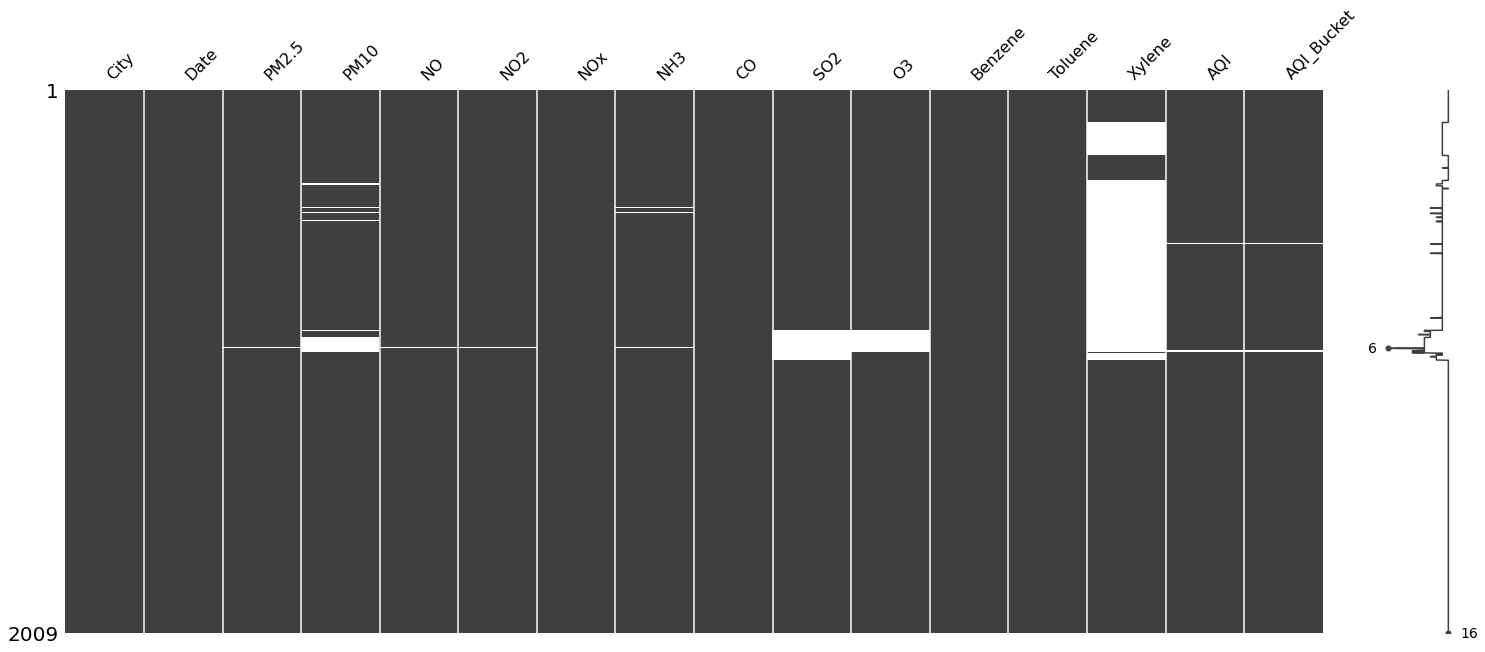

In [ ]:
print('Missing Values of : delhi_data')
matrix(df1)

In [ ]:
df1.interpolate(limit_direction="both",inplace=True)
df1.isnull().sum()

City           0
Date           0
PM2.5          0
PM10           0
NO             0
NO2            0
NOx            0
NH3            0
CO             0
SO2            0
O3             0
Benzene        0
Toluene        0
Xylene         0
AQI            0
AQI_Bucket    10
dtype: int64

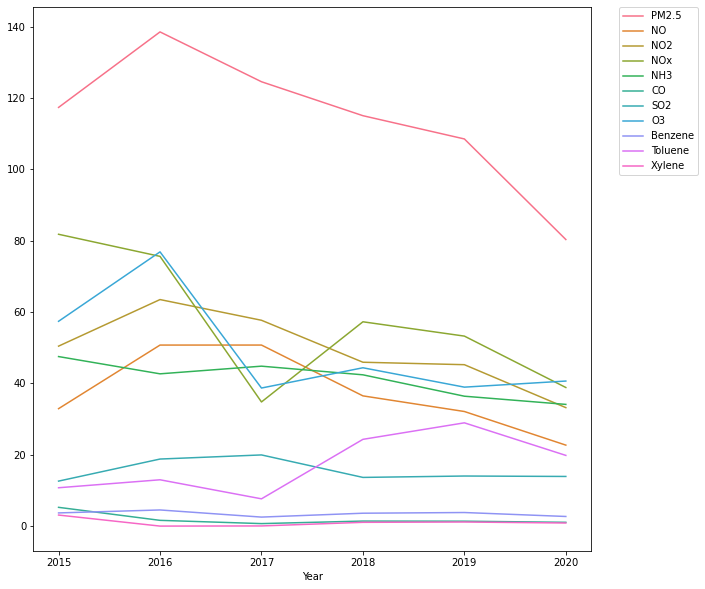

In [ ]:
df1['Year'] = pd.DatetimeIndex(df1['Date']).year
plt.figure(figsize=(10,10))
df1['Month'] = pd.DatetimeIndex(df1['Date']).month
sns.lineplot(data = df1.groupby('Year').mean().drop(['AQI','Month','PM10'],axis=1),dashes=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

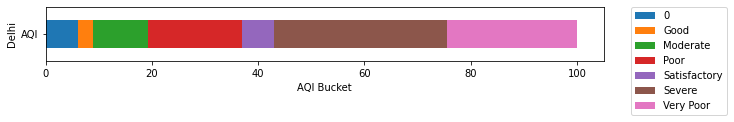

In [ ]:

df_city_day_pivot_table = df1.fillna(0).sort_values(by=['AQI', 'AQI_Bucket'], ascending=False).pivot_table(values='AQI', columns='AQI_Bucket', aggfunc=np.mean).fillna(0)
plt.rcParams['figure.figsize'] = (10,1)
ax = df_city_day_pivot_table.apply(lambda x: x*100/sum(x), axis=1).plot(kind='barh', stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
ax.set_ylabel('Delhi');
ax.set_xlabel('AQI Bucket');

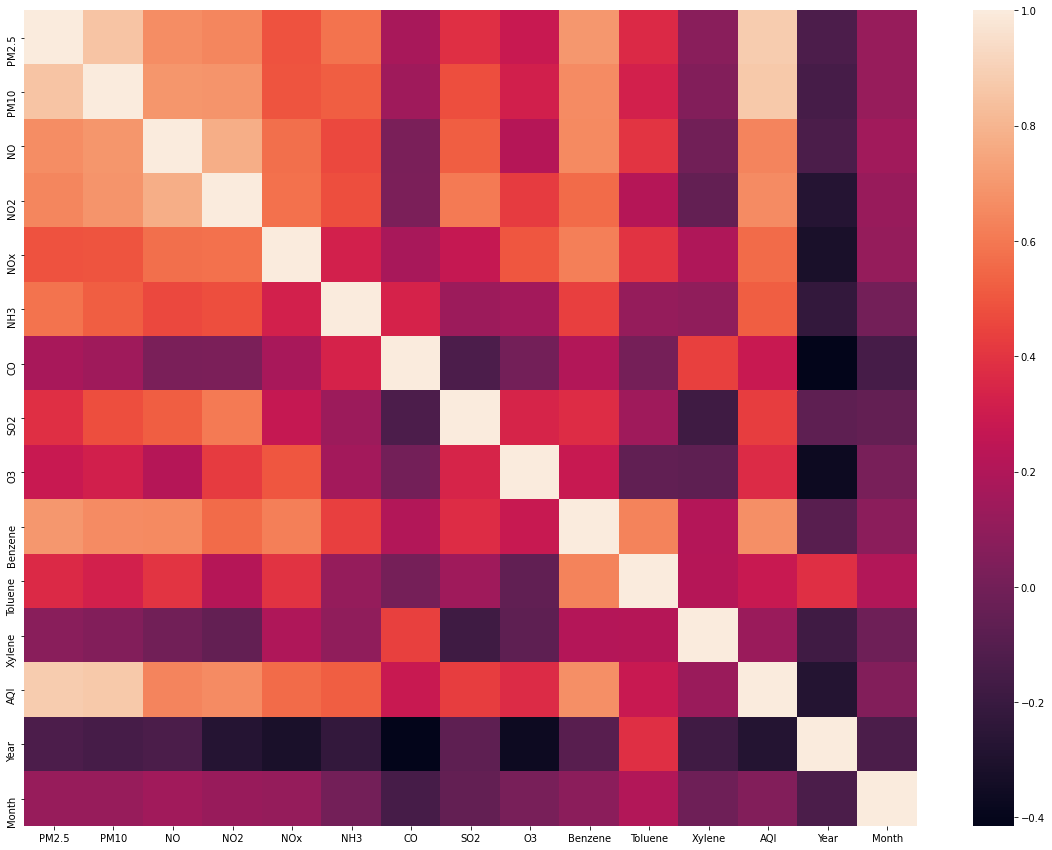

In [ ]:
plt.figure(figsize=(20,15))
corr = df1.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [ ]:

df1.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Year,Month
10229,Delhi,2015-01-01,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,9.84,472.0,Severe,2015,1
10230,Delhi,2015-01-02,186.18,269.55,62.09,32.87,88.14,31.83,9.54,6.65,29.97,10.55,20.09,4.29,454.0,Severe,2015,1
10231,Delhi,2015-01-03,87.18,131.90,25.73,30.31,47.95,69.55,10.61,2.65,19.71,3.91,10.23,1.99,143.0,Moderate,2015,1
10232,Delhi,2015-01-04,151.84,241.84,25.01,36.91,48.62,130.36,11.54,4.63,25.36,4.26,9.71,3.34,319.0,Very Poor,2015,1
10233,Delhi,2015-01-05,146.60,219.13,14.01,34.92,38.25,122.88,9.20,3.33,23.20,2.80,6.21,2.96,325.0,Very Poor,2015,1


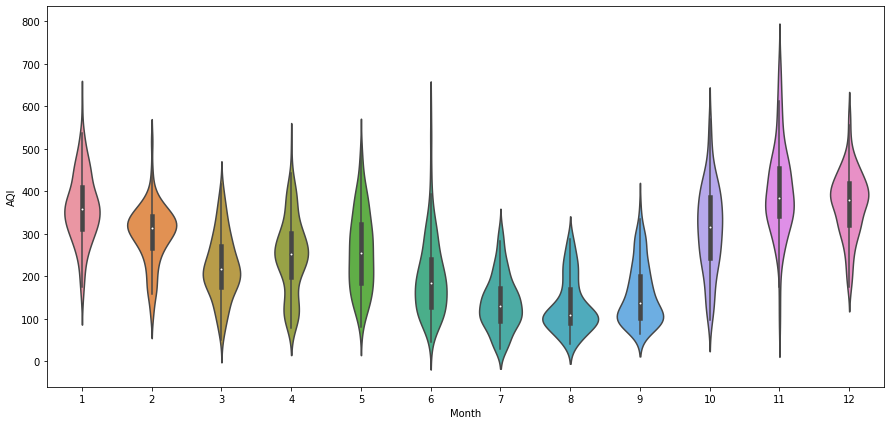

In [ ]:
plt.figure(figsize=(15,7))
ax = sns.violinplot(x="Month", y="AQI", data=df1)


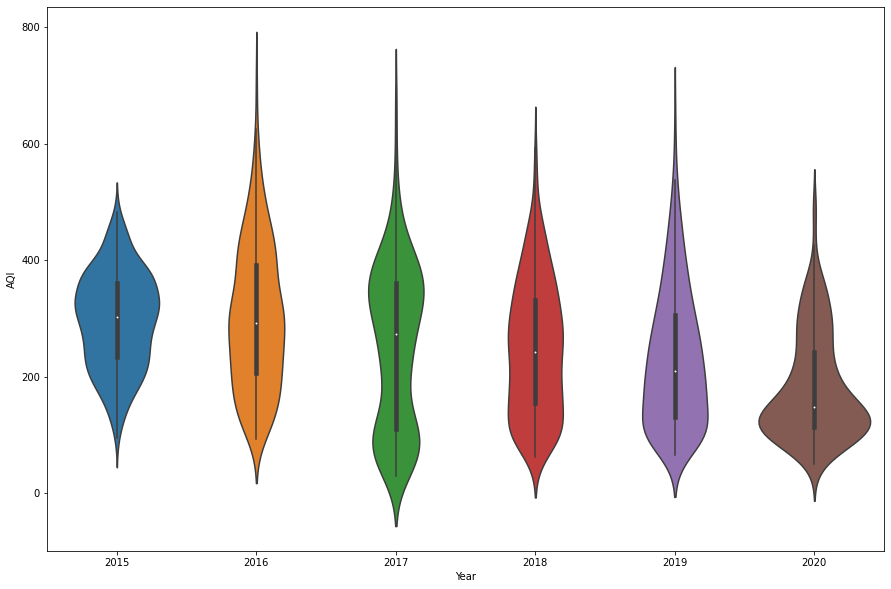

In [ ]:
plt.figure(figsize=(15,10))
ax = sns.violinplot(x="Year", y="AQI", data=df1)

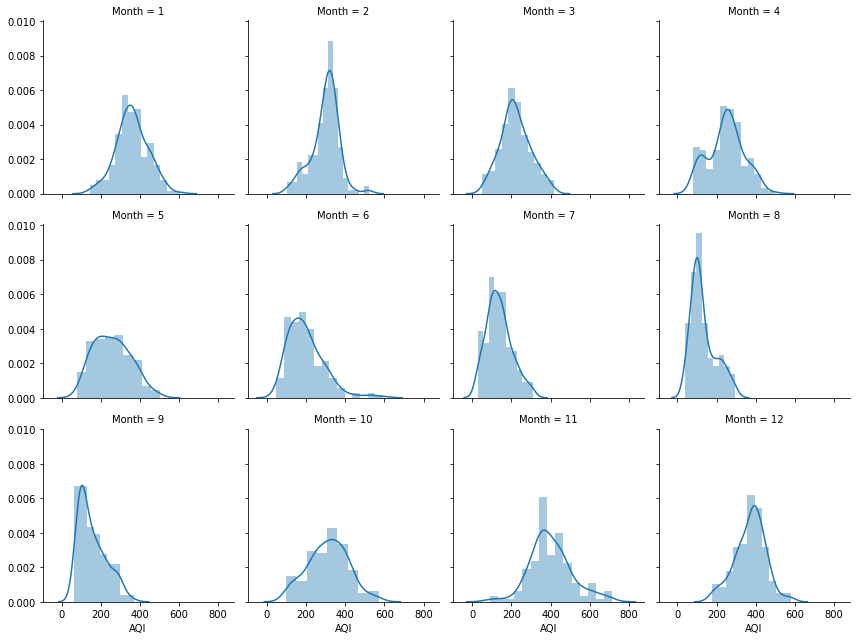

In [ ]:
g = sns.FacetGrid(df1, col='Month', col_wrap=4)
g.map(sns.distplot, "AQI")
plt.show()

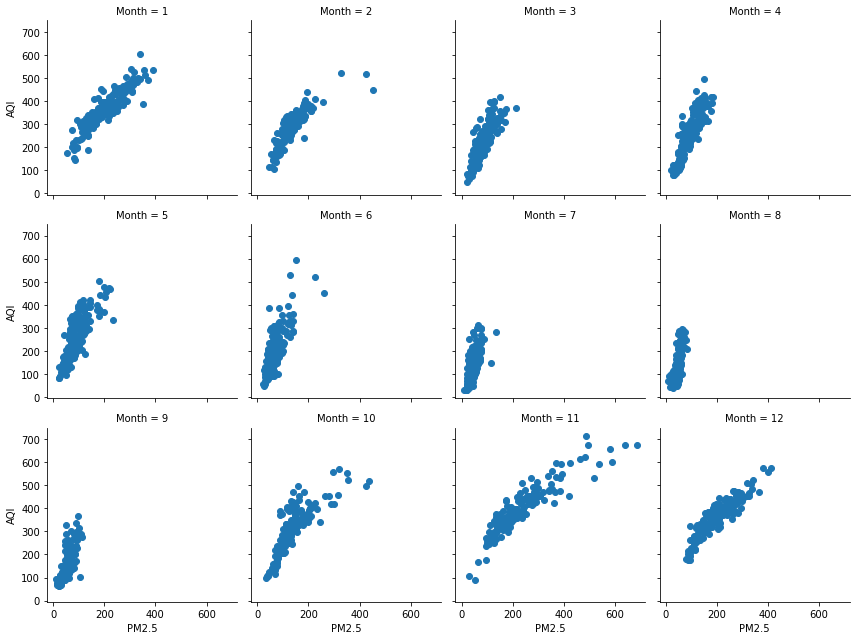

In [ ]:
g = sns.FacetGrid(df1, col='Month', col_wrap=4)
g.map(plt.scatter,'PM2.5', "AQI")
plt.show()

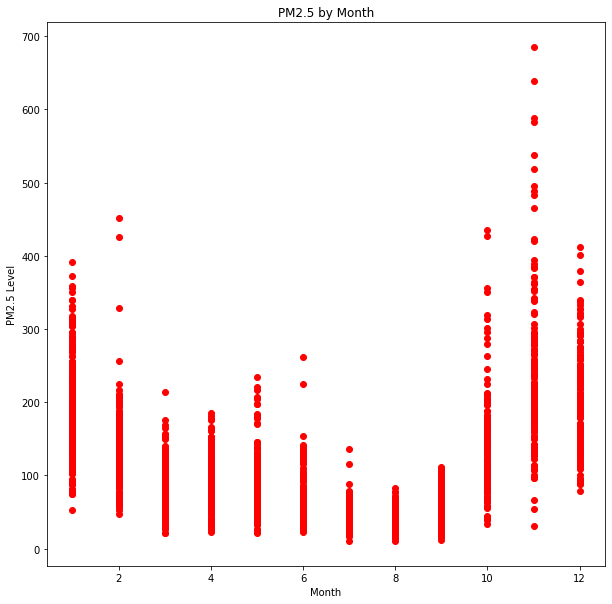

In [ ]:

x = df1['Month']
y = df1['PM2.5']
plt.figure(figsize=(10,10))
plt.scatter(x,y,color='red')
plt.xlabel('Month')
plt.ylabel('PM2.5 Level')
plt.title('PM2.5 by Month')
plt.show()


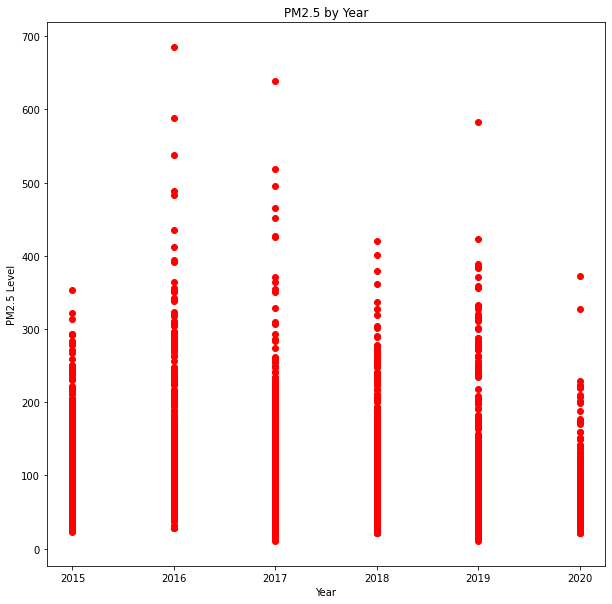

In [ ]:
x = df1['Year']
y = df1['PM2.5']
plt.figure(figsize=(10,10))
plt.scatter(x,y,color='red')
plt.xlabel('Year')
plt.ylabel('PM2.5 Level')
plt.title('PM2.5 by Year')
plt.show()


In [ ]:
from statsmodels.api import tsa

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import linear_model

In [ ]:
df1.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Year,Month
10229,Delhi,2015-01-01,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,9.84,472.0,Severe,2015,1
10230,Delhi,2015-01-02,186.18,269.55,62.09,32.87,88.14,31.83,9.54,6.65,29.97,10.55,20.09,4.29,454.0,Severe,2015,1
10231,Delhi,2015-01-03,87.18,131.90,25.73,30.31,47.95,69.55,10.61,2.65,19.71,3.91,10.23,1.99,143.0,Moderate,2015,1
10232,Delhi,2015-01-04,151.84,241.84,25.01,36.91,48.62,130.36,11.54,4.63,25.36,4.26,9.71,3.34,319.0,Very Poor,2015,1
10233,Delhi,2015-01-05,146.60,219.13,14.01,34.92,38.25,122.88,9.20,3.33,23.20,2.80,6.21,2.96,325.0,Very Poor,2015,1


In [ ]:
from pandas import datetime as dt

In [ ]:
df1['Date'] = df1['Date'].dt.date
df1.set_index(pd.to_datetime(df1['Date']), inplace=True)
df1.drop('Date', axis=1, inplace=True)
df1.head()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Year,Month
Date,,,,,,,,,,,,,,,,,
2015-01-01,Delhi,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,9.84,472.0,Severe,2015,1
2015-01-02,Delhi,186.18,269.55,62.09,32.87,88.14,31.83,9.54,6.65,29.97,10.55,20.09,4.29,454.0,Severe,2015,1
2015-01-03,Delhi,87.18,131.90,25.73,30.31,47.95,69.55,10.61,2.65,19.71,3.91,10.23,1.99,143.0,Moderate,2015,1
2015-01-04,Delhi,151.84,241.84,25.01,36.91,48.62,130.36,11.54,4.63,25.36,4.26,9.71,3.34,319.0,Very Poor,2015,1
2015-01-05,Delhi,146.60,219.13,14.01,34.92,38.25,122.88,9.20,3.33,23.20,2.80,6.21,2.96,325.0,Very Poor,2015,1


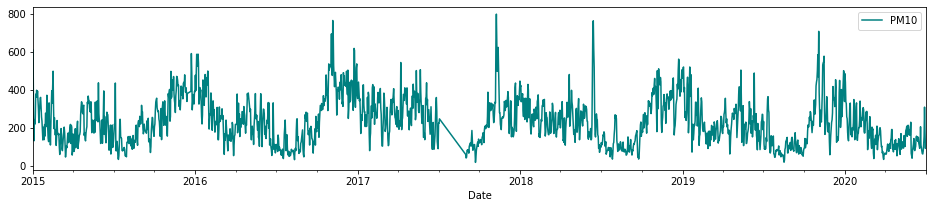

In [ ]:
df1.plot(y='PM10', color='teal', figsize=(16,3))

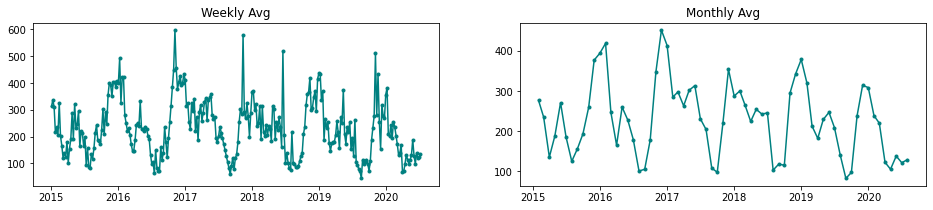

In [ ]:
AQI_weekly_avg = df1.resample('W').apply(np.mean)
AQI_monthly_avg = df1.resample('M').apply(np.mean)
plt.figure(figsize=(16,3))
plt.subplot(121)
plt.title('Weekly Avg')
plt.plot(AQI_weekly_avg.PM10, "-o", markersize=3, color='teal')
plt.subplot(122)
plt.title('Monthly Avg')
plt.plot(AQI_monthly_avg.PM10, "-o", markersize=3, color='teal')

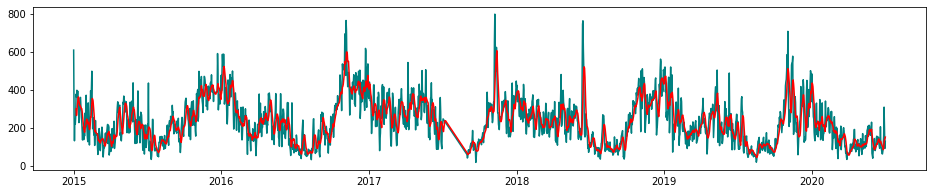

In [ ]:
rolling_mean = df1.PM10.rolling(window=7, center=False).mean() #window of 7 (weekly avg) captures our data better 
plt.figure(figsize=(16,3))
plt.plot(df1.PM10, color='teal')
plt.plot(rolling_mean, 'red')

Text(0, 0.5, 'Autocorrelation')

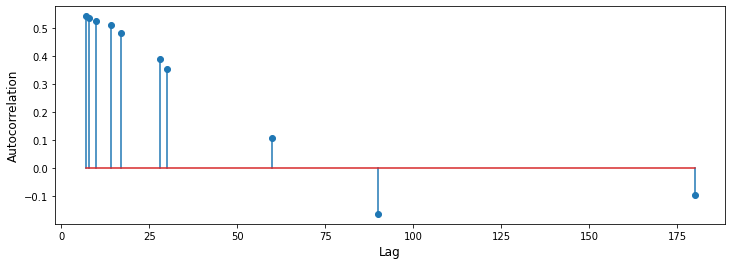

In [ ]:
lags = [7, 8, 10, 14, 17, 28, 30, 60, 90, 180] 
autocorrs = [df1.PM10.autocorr(lag=lag) 
                   for lag in lags]
plt.figure(figsize=(12, 4))
plt.stem(lags, autocorrs)
plt.xlabel("Lag", fontsize=12)
plt.ylabel("Autocorrelation", fontsize=12)

In [ ]:
data=df1

In [ ]:
data.head()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Year,Month
Date,,,,,,,,,,,,,,,,,
2015-01-01,Delhi,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,9.84,472.0,Severe,2015,1
2015-01-02,Delhi,186.18,269.55,62.09,32.87,88.14,31.83,9.54,6.65,29.97,10.55,20.09,4.29,454.0,Severe,2015,1
2015-01-03,Delhi,87.18,131.90,25.73,30.31,47.95,69.55,10.61,2.65,19.71,3.91,10.23,1.99,143.0,Moderate,2015,1
2015-01-04,Delhi,151.84,241.84,25.01,36.91,48.62,130.36,11.54,4.63,25.36,4.26,9.71,3.34,319.0,Very Poor,2015,1
2015-01-05,Delhi,146.60,219.13,14.01,34.92,38.25,122.88,9.20,3.33,23.20,2.80,6.21,2.96,325.0,Very Poor,2015,1


In [ ]:
# # from pandas.plotting import autocorrelation_plot
# from pandas.plotting import autocorrelation_plot
# autocorrelation_plot(data)

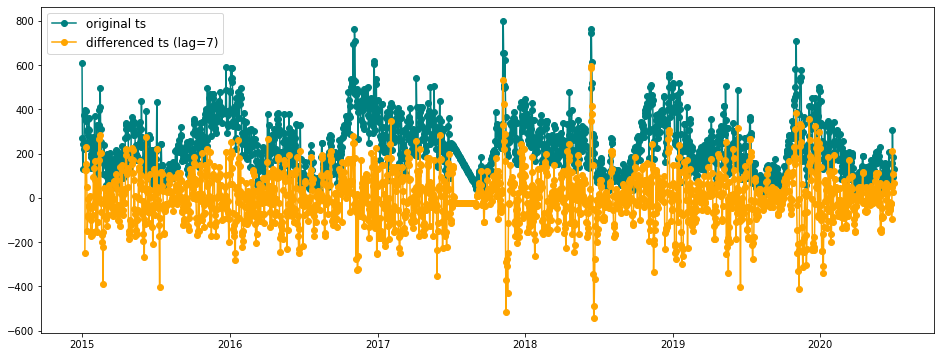

In [ ]:
plt.figure(figsize=(16, 6))
plt.plot(data.PM10, '-o', color='teal', label="original ts")
plt.plot(data.PM10.diff(7), '-o', color='orange', label="differenced ts (lag=7)")
plt.legend(fontsize=12)

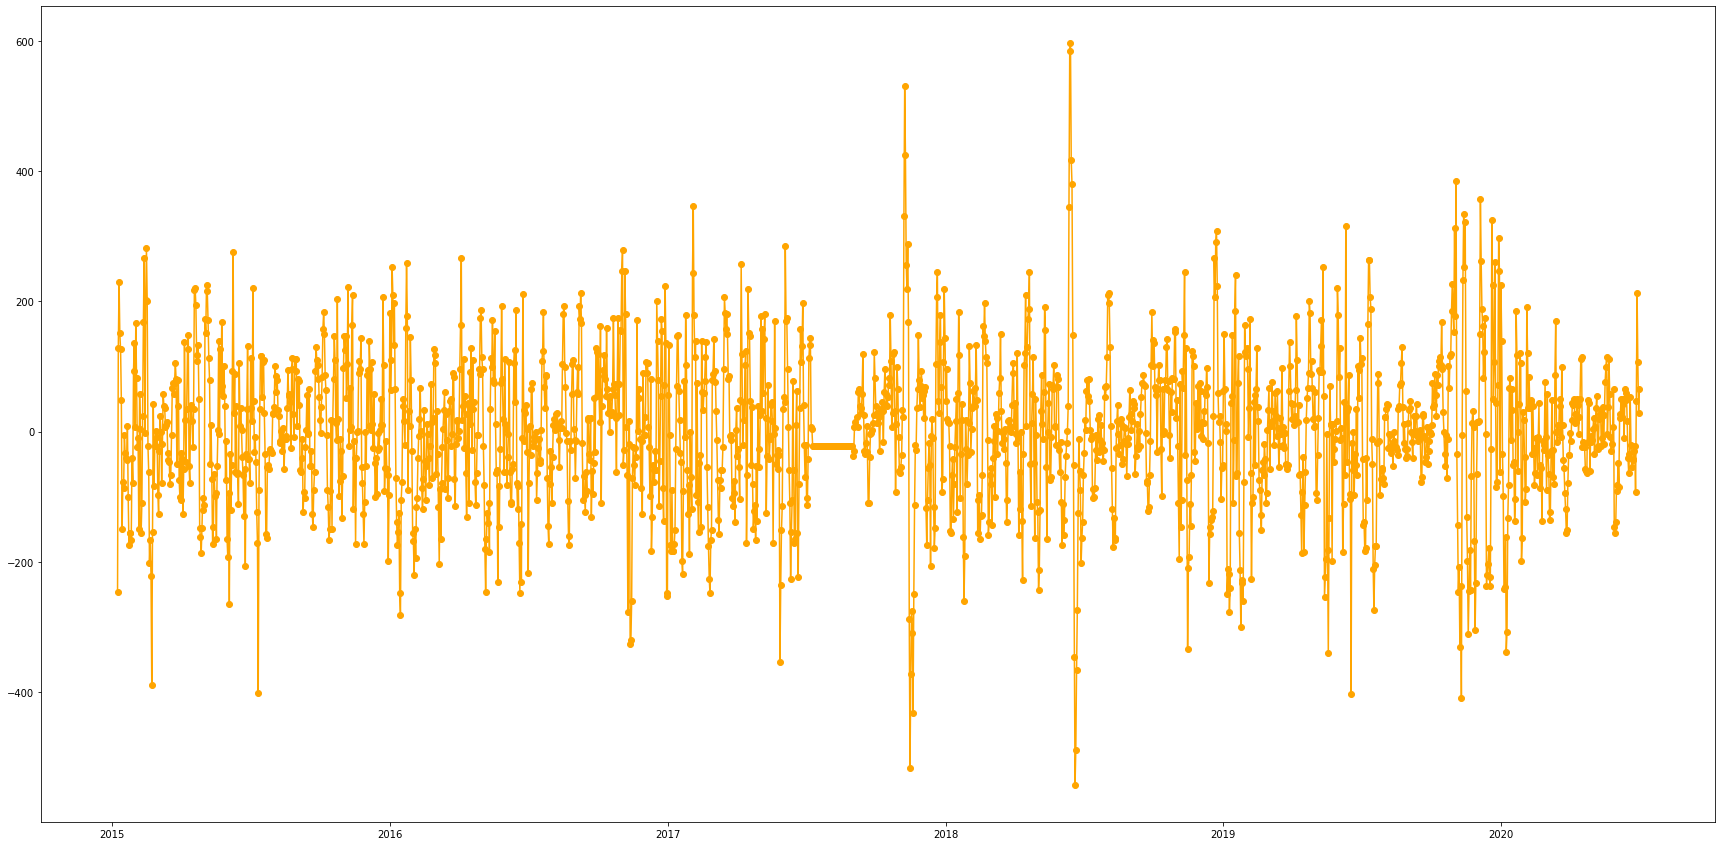

In [ ]:
AQI_data = data.PM10
AQI_diff = AQI_data.diff(7).dropna() 

plt.figure(figsize=(30,15))
plt.plot(AQI_diff, "-o", color='orange')

In [ ]:
time_series = AQI_diff

In [ ]:
# ar = tsa.AR(time_series)
# optlag = ar.select_order(91, ic='aic') 
# print("Best optimal lag for ar model: {}".format(optlag))

In [ ]:
ar = tsa.AR(time_series)
optlag = ar.select_order(91, ic='aic') 
print("Best optimal lag for ar model: {}".format(optlag))

MAE = 48.585
MAE2 = 33.079


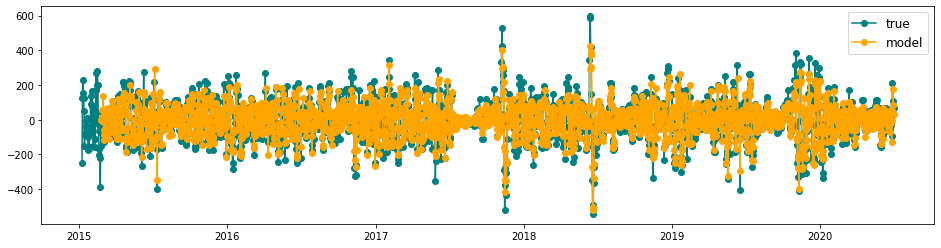

In [ ]:
lag = 47 
ar = tsa.AR(time_series)
ar_fit = ar.fit(maxlag=lag, ic='aic')
ar_prediction = ar_fit.predict(start=lag)

plt.figure(figsize=(16, 4))
plt.plot(time_series, '-o', label='true', color='teal')
plt.plot(ar_prediction, '-o', label='model', color='orange')
plt.legend(fontsize=12);

print('MAE = {0:.3f}'.format(mean_absolute_error(time_series[lag:], ar_prediction)))
print('MAE2 = {0:.3f}'.format(mean_absolute_error(time_series[-90:], ar_prediction[-90:]))) #error only for the last 90 days

MAE = 45.485
MAE2 = 30.872


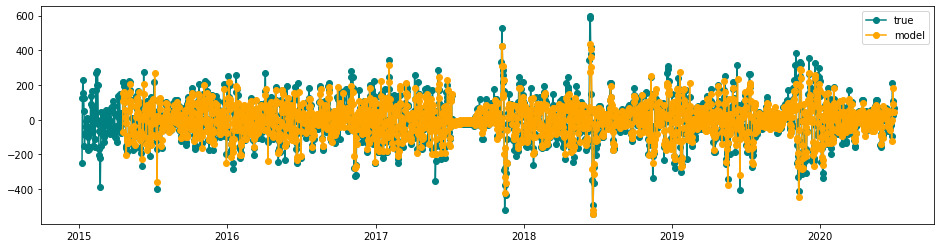

In [ ]:
arma = tsa.ARMA(time_series, order=(7, 7)) #7 p and 7 q for lag and moving average 
arma_fit = arma.fit()
start=100
arma_prediction = arma_fit.predict(start=start)

plt.figure(figsize=(16, 4))
plt.plot(time_series, '-o', label='true', color='teal')
plt.plot(arma_prediction, '-o', label='model', color='orange')
plt.legend();

print('MAE = {0:.3f}'.format(mean_absolute_error(time_series[start:], arma_prediction)))
print('MAE2 = {0:.3f}'.format(mean_absolute_error(time_series[-90:], arma_prediction[-90:]))) #error only for the last 90 days

In [ ]:
print(AQI_data[-7:])

Date
2020-06-25     77.76
2020-06-26    112.08
2020-06-27    155.94
2020-06-28    308.65
2020-06-29    184.12
2020-06-30     91.98
2020-07-01    128.66
Name: PM10, dtype: float64


In [ ]:
#7 out of sample prediction with ARMA
arma = tsa.ARMA(time_series, order=(7, 7)) 
arma = arma.fit()
arma_forecast = arma.predict(end=len(time_series)+6)[-7:]
arma_forecast

2020-07-02     60.788316
2020-07-03     13.109183
2020-07-04    -39.021553
2020-07-05   -198.157008
2020-07-06    -69.877297
2020-07-07     35.522373
2020-07-08     23.339171
Freq: D, dtype: float64

In [ ]:
#and here ARIMA which is basically same thing as ARMA but in a slightly different implementation.
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(time_series, order=(7,0,7))
arima_fit = model.fit()
arima_forecast= arima_fit.forecast(steps=7)[0]
arima_forecast

array([  60.78831619,   13.10918287,  -39.02155253, -198.15700796,
        -69.87729659,   35.52237305,   23.33917059])

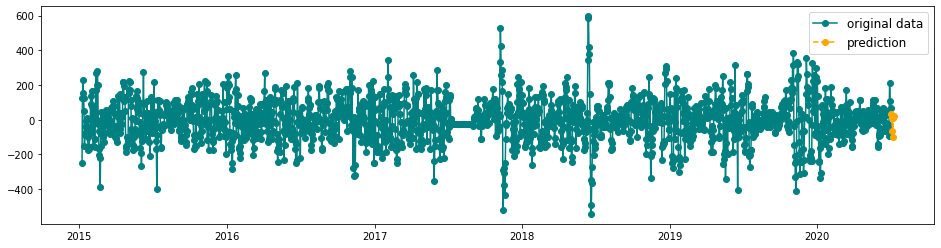

In [ ]:
plt.figure(figsize=(16, 4))
plt.plot(time_series, '-o', label="original data", color='teal')
plt.plot(ar_forecast, '--o', label='prediction', color='orange')
plt.legend(fontsize=12)

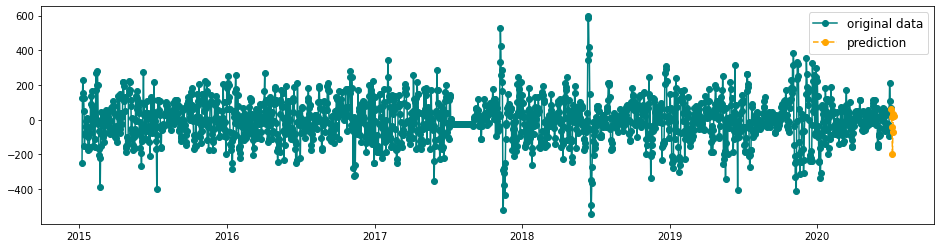

In [ ]:
#ARMA model's 7 out sample predicitons 
plt.figure(figsize=(16, 4))
plt.plot(time_series, '-o', label="original data", color='teal')
plt.plot(arma_forecast, '--o', label='prediction', color='orange')
plt.legend(fontsize=12)prices

In [ ]:
print(AQI_data[-7:])

Date
2020-06-25     77.76
2020-06-26    112.08
2020-06-27    155.94
2020-06-28    308.65
2020-06-29    184.12
2020-06-30     91.98
2020-07-01    128.66
Name: PM10, dtype: float64


In [ ]:
idx = ar_forecast.index.values

forecast_prices = []
lag = 7
for i, diff in enumerate(ar_forecast): #choosing AR as it produced lower MAE than ARMA model
    prev_value = AQI_data[-(lag)+i:][0]
    forecast_prices.append(prev_value+diff)
    
bitcoin_forecast = pd.Series(forecast_prices, index=idx)
bitcoin_forecast

2020-07-02    110.546491
2020-07-03    126.654737
2020-07-04    167.066107
2020-07-05    241.604754
2020-07-06     85.587068
2020-07-07    101.571162
2020-07-08    149.128121
dtype: float64

<function matplotlib.pyplot.show>

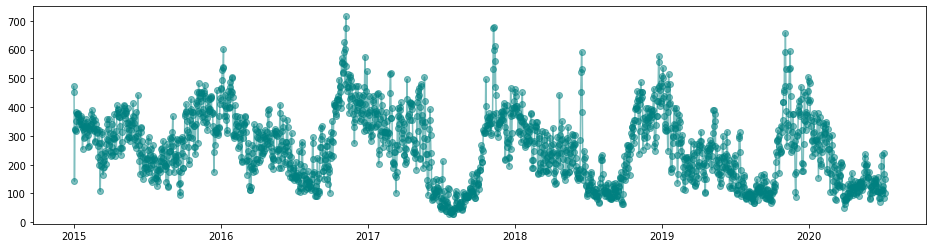

In [ ]:
hist_values = data['AQI'].append(bitcoin_forecast)

plt.figure(figsize=(16,4))
plt.plot(hist_values, '-o', color='teal', alpha=0.5)
plt.show

In [ ]:
pd.set_option('display.max_rows', None)
df1

In [ ]:
real_AQI= pd.DataFrame(data={"PM10":[103, 102, 74, 43, 66, 40, 48],
                          "dates":['2020-07-02', '2020-07-03', '2020-07-04', '2020-07-05', '2020-07-06', '2020-07-07',
                               '2020-07-08']})

real_AQI.set_index(pd.to_datetime(real_AQI['dates']), inplace=True)
real_AQI.drop('dates', axis=1, inplace=True)
real_AQI

,PM10
dates,
2020-07-02,103
2020-07-03,102
2020-07-04,74
2020-07-05,43
2020-07-06,66
2020-07-07,40
2020-07-08,48


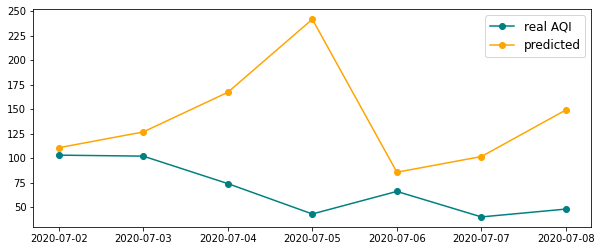

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(real_AQI, "-o", color="teal", label="real AQI")
plt.plot(bitcoin_forecast, "-o", color="orange", label="predicted")
plt.legend(fontsize=12)
plt.show()

In [ ]:
# def organize_data(to_forecast, window, horizon):
    
#     shape = to_forecast.shape[:-1] + (to_forecast.shape[-1] - window + 1, window)
#     strides = to_forecast.strides + (to_forecast.strides[-1],)
#     X = np.lib.stride_tricks.as_strided(to_forecast,
#                                         shape=shape,
#                                         strides=strides)
#     y = np.array([X[i+horizon][-1] for i in range(len(X)-horizon)])
#     return X[:-horizon], y

# lag = 90
# X, y = organize_data(time_series, lag,1)

In [ ]:
# from datetime import datetime

# df1['Date'] = pd.to_datetime(df1['Date'])

# def time_series(start, end):
#     time_series_df = df1[['Date', 'AQI']][(df1['Date'] >= start) & (df1['Date'] <= end)]
#     x= df1['Date'].values
#     y = df1['AQI'].values
#     plt.plot(x,y)
#     plt.xlabel('Time')
#     plt.ylabel('PM2.5 Value')
#     plt.title('PM2.5 Time Series')
#     return plt.show();


In [ ]:
df1.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Year,Month
10229,Delhi,2015-01-01,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,9.84,472.0,Severe,2015,1
10230,Delhi,2015-01-02,186.18,269.55,62.09,32.87,88.14,31.83,9.54,6.65,29.97,10.55,20.09,4.29,454.0,Severe,2015,1
10231,Delhi,2015-01-03,87.18,131.90,25.73,30.31,47.95,69.55,10.61,2.65,19.71,3.91,10.23,1.99,143.0,Moderate,2015,1
10232,Delhi,2015-01-04,151.84,241.84,25.01,36.91,48.62,130.36,11.54,4.63,25.36,4.26,9.71,3.34,319.0,Very Poor,2015,1
10233,Delhi,2015-01-05,146.60,219.13,14.01,34.92,38.25,122.88,9.20,3.33,23.20,2.80,6.21,2.96,325.0,Very Poor,2015,1


In [ ]:
# plt.figure(figsize=(15,10))
# time_series('2015','2018')

In [ ]:
# def plot_df(df1, x, y, title="", xlabel='Date', ylabel='AQI', dpi=100):
#     plt.figure(figsize=(16,5), dpi=dpi)
#     plt.plot(x, y, color='tab:red')
#     plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
#     plt.show()

# plot_df(df1, x= df1['Date'].values, y=df1.AQI, title='AQI with Time')    

In [ ]:
# plt.figure(figsize=(15,10))
# time_series('2016-09-04','2016-09-07')

# **Splitting** **the Dataset**

In [ ]:
df1.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Year,Month
10229,Delhi,2015-01-01,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,9.84,472.0,Severe,2015,1
10230,Delhi,2015-01-02,186.18,269.55,62.09,32.87,88.14,31.83,9.54,6.65,29.97,10.55,20.09,4.29,454.0,Severe,2015,1
10231,Delhi,2015-01-03,87.18,131.90,25.73,30.31,47.95,69.55,10.61,2.65,19.71,3.91,10.23,1.99,143.0,Moderate,2015,1
10232,Delhi,2015-01-04,151.84,241.84,25.01,36.91,48.62,130.36,11.54,4.63,25.36,4.26,9.71,3.34,319.0,Very Poor,2015,1
10233,Delhi,2015-01-05,146.60,219.13,14.01,34.92,38.25,122.88,9.20,3.33,23.20,2.80,6.21,2.96,325.0,Very Poor,2015,1


In [ ]:
y = df1['AQI']

In [ ]:
X=df1.drop(['City','Date','Benzene','Toluene','Xylene','AQI','AQI_Bucket','Year','Month'],axis=1)
X.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3
10229,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68
10230,186.18,269.55,62.09,32.87,88.14,31.83,9.54,6.65,29.97
10231,87.18,131.90,25.73,30.31,47.95,69.55,10.61,2.65,19.71
10232,151.84,241.84,25.01,36.91,48.62,130.36,11.54,4.63,25.36
10233,146.60,219.13,14.01,34.92,38.25,122.88,9.20,3.33,23.20


In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3)

In [ ]:
X_test.shape,y_test.shape

((603, 9), (603,))

In [ ]:
X.columns

Index(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3'], dtype='object')

## **Linear Regression model**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
reg = LinearRegression()

In [ ]:
reg.fit(X_test,y_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lin_pred = reg.predict(X_test)
lin_pred

array([214.37793466, 341.80560509, 225.18434106, 278.19256896,
        98.14662775, 275.14199726, 219.64988068, 176.78655849,
       317.58736607, 140.60753809, 112.05016563, 211.28039653,
       204.00820085, 444.98076501, 167.81652497, 226.25296326,
       245.84858581, 260.17021466, 471.08110479, 116.56750535,
       131.40499637, 111.30160521, 135.28104332, 295.49826493,
       635.04034858, 146.28489228, 363.26938642, 150.06939022,
       480.23889508, 499.00489561, 382.9278445 , 188.21717912,
       161.91692008, 108.59982658, 459.71115693, 136.94402736,
       300.27414499, 212.87367602, 213.60026779, 165.94466959,
       112.52520038, 317.30551217, 124.88951715, 207.33027628,
       152.64398613, 145.29978889, 213.88518297, 268.60459822,
       165.74250081, 178.48563587, 140.41108779, 289.09700115,
       338.65072547, 139.87944643, 529.29092633, 221.3956872 ,
       282.1937028 , 345.54770708, 353.40628877, 176.51074584,
       206.02057633, 347.72799888, 187.71699637, 166.09

In [ ]:
linear_regression_score = reg.score(X_test,y_test)
linear_regression_score

0.8634911832007309

In [ ]:
print('Coefficients:\n',reg.coef_)

Coefficients:
 [ 0.78359776  0.36622947 -0.16217055 -0.05953057  0.34089011 -0.48383345
  5.46528334  0.78732825  0.13622126]


In [ ]:
from math import sqrt
print("Root mean squared error:%.2f" % sqrt(mean_squared_error(y_test, lin_pred)))

Root mean squared error:45.18


In [ ]:
print('R-squared: %.2f' % r2_score(y_test, lin_pred))

R-squared: 0.86


For TrainDataset

print('R-squared: %.2f' % r2_score(y_train, lin_pred)) = 0.86

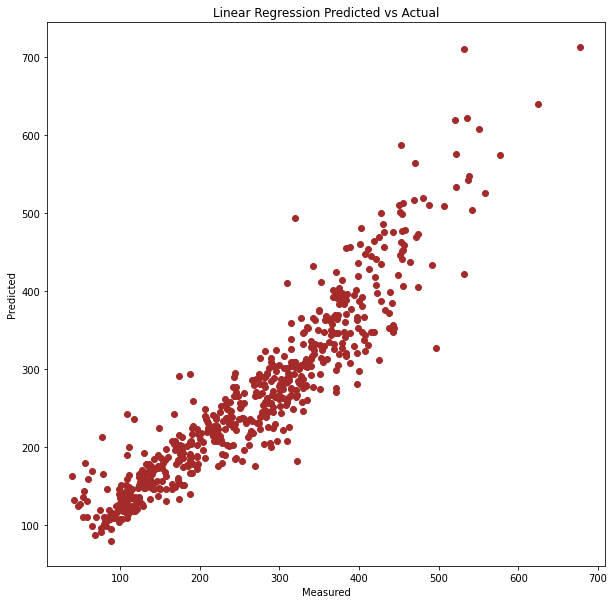

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, lin_pred,color='brown')
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Linear Regression Predicted vs Actual')
plt.show()

## **Neural Network** **Regression**

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create MLPRegressor object
MLP = MLPRegressor()

In [ ]:
MLP.fit(X_train, y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [ ]:
neural_network_regression_score = MLP.score(X_test, y_test)
neural_network_regression_score

0.8896049074254992

In [ ]:
nnr_pred = MLP.predict(X_test)

In [ ]:
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, nnr_pred)))

Root mean squared error: 39.94


In [ ]:
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, nnr_pred))

Mean absolute error: 30.23


In [ ]:
print('R-squared: %.2f' % r2_score(y_test, nnr_pred))

R-squared: 0.89


For train Dataset

print('R-squared: %.2f' % r2_score(y_train, nnr_pred)) = 0.89

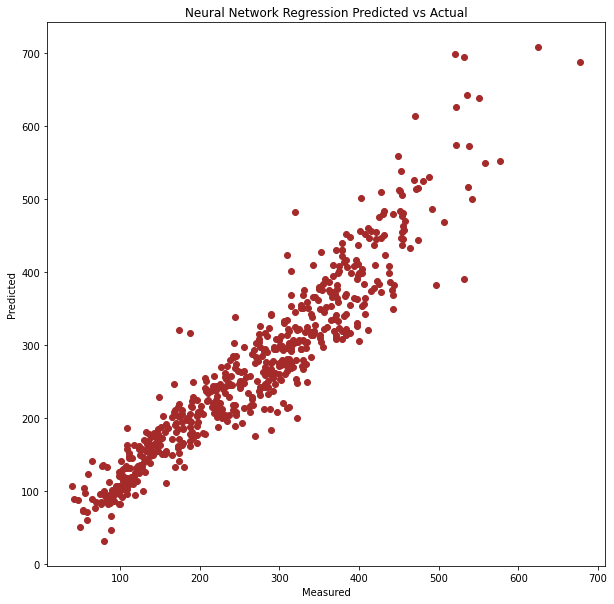

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, nnr_pred,color='brown')
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Neural Network Regression Predicted vs Actual')
plt.show()


## **Random** **Forest** **Regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [ ]:
regr_rf = RandomForestRegressor(n_estimators=200, random_state=1234)

In [ ]:

regr_rf.fit(X_test, y_test)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=1234, verbose=0, warm_start=False)

In [ ]:
decision_forest_score = regr_rf.score(X_test, y_test)
decision_forest_score

0.9888985969569524

In [ ]:
regr_rf_pred = regr_rf.predict(X_test)

In [ ]:
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, regr_rf_pred)))

Root mean squared error: 12.89


In [ ]:
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, regr_rf_pred))

Mean absolute error: 9.37


In [ ]:
print('R-squared: %.2f' % r2_score(y_test, regr_rf_pred))


R-squared: 0.99


For Train Dataset

print('R-squared: %.2f' % r2_score(y_train, regr_rf_pred)) = 0.99

In [ ]:
X.columns

Index(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3'], dtype='object')

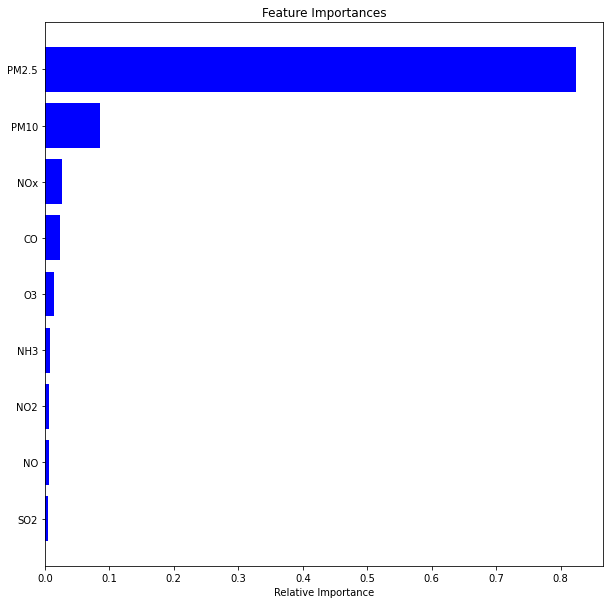

In [ ]:
features = X.columns
importances = regr_rf.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

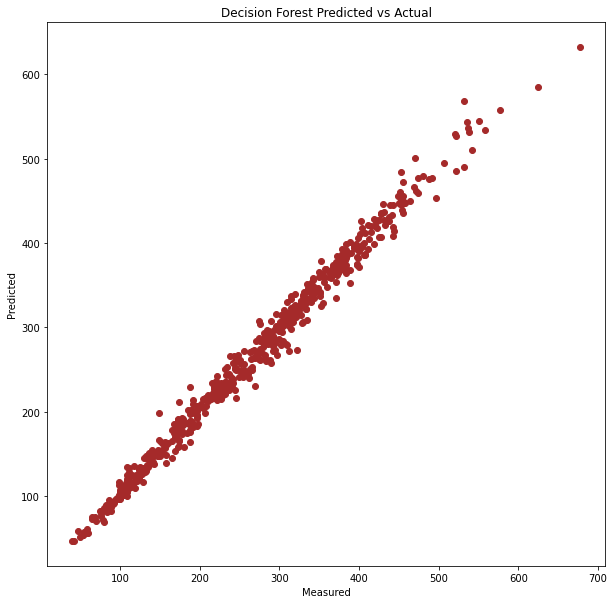

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, regr_rf_pred,color='brown')
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Decision Forest Predicted vs Actual')
plt.show()

## **XGBoost**

In [ ]:
from xgboost.sklearn import XGBRegressor

#Fitting XGB regressor 
xboost = XGBRegressor(n_estimators=200)

In [ ]:
xboost.fit(X_test, y_test)

[03:49:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=200,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
xgb_score = xboost.score(X_test, y_test)
xgb_score

0.9838759263936652

In [ ]:
xboost_pred = xboost.predict(X_test)

In [ ]:
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, xboost_pred)))

Root mean squared error: 15.53


In [ ]:
print('R-squared: %.2f' % r2_score(y_test, xboost_pred))

R-squared: 0.98


For Train Dataset

print('R-squared: %.2f' % r2_score(y_train, xboost_pred)) = 0.97

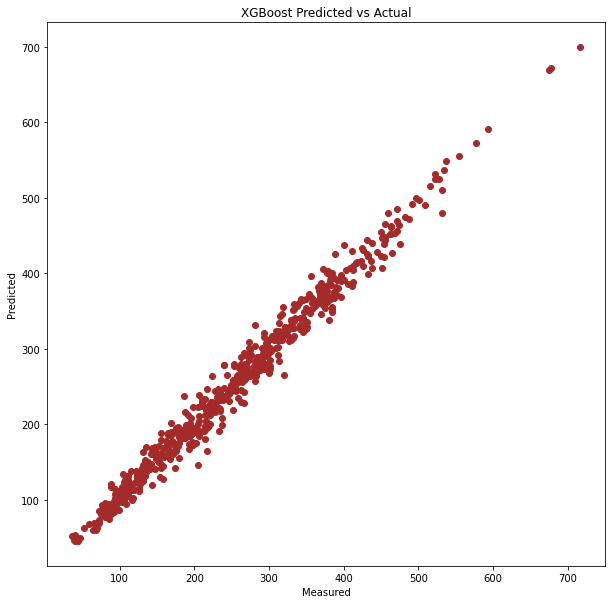

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, xboost_pred,color='brown')
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('XGBoost Predicted vs Actual')
plt.show()

## **Lasso**

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso()

In [ ]:
lasso.fit(X_test, y_test)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
lasso_score = lasso.score(X_test, y_test)
lasso_score

0.8634764124093082

In [ ]:
lasso_pred = lasso.predict(X_test)

In [ ]:

print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, lasso_pred)))

Root mean squared error: 45.19


In [ ]:
print('R-squared: %.2f' % r2_score(y_test, lasso_pred))

R-squared: 0.86


For Train Dataset

print('R-squared: %.2f' % r2_score(y_train, lasso_pred)) = 0.87

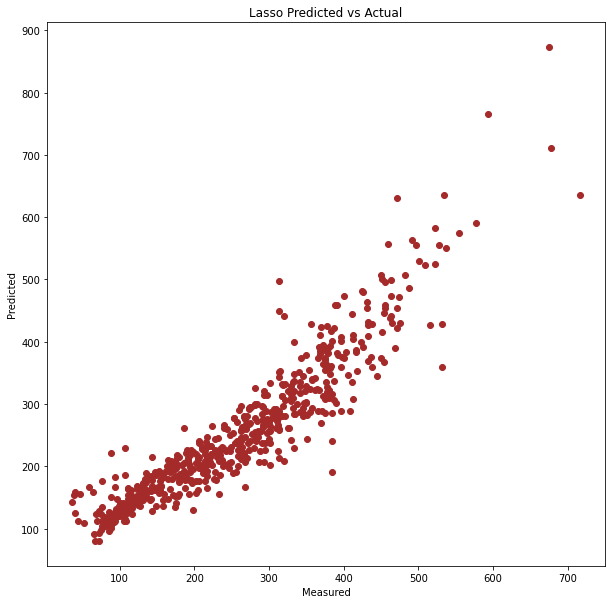

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, lasso_pred,color='brown')
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Lasso Predicted vs Actual')
plt.show()

In [ ]:
print("Scores:")
print("Linear regression score: ", linear_regression_score)
print("Neural network regression score: ", neural_network_regression_score)
print("Lasso regression score: ", lasso_score)
print("Decision forest score: ", decision_forest_score)
print("XGBoost score:", xgb_score)
print("\n")
print("RMSE:")
print("Linear regression RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, lin_pred)))
print("Neural network RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, nnr_pred)))
print("Lasso RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, lasso_pred)))
print("Decision forest RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, regr_rf_pred)))
print("XGBoost RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, xboost_pred)))

Scores:
Linear regression score:  0.8659831779923435
Neural network regression score:  0.8840679588885182
Lasso regression score:  0.8657413582221593
Decision forest score:  0.924087600661983
XGBoost score: 0.917450431882004


RMSE:
Linear regression RMSE: 43.29
Neural network RMSE: 40.27
Lasso RMSE: 43.33
Decision forest RMSE: 32.58
XGBoost RMSE: 33.98
